In [ ]:
import pandas as pd
import numpy as np

Mounted at /content/drive


In [ ]:
pd.set_option("display.max_rows", None)      # show all 116 rows (one per column)
pd.set_option("display.max_columns", None)   # not critical here, but fine
pd.set_option("display.width", 0)            # auto-width
pd.set_option("display.max_colwidth", None)  # don't truncate names

In [ ]:
path = "/content/drive/My Drive/ECAs/EY DS Challenge 2026/dataset/Glorich"

In [ ]:
landsat_df = pd.read_csv("/content/drive/My Drive/ECAs/EY DS Challenge 2026/Jupyter Notebook Package/landsat_features_training.csv")

In [ ]:
catchment_df = pd.read_csv(path + '/catchment_properties.csv')

In [ ]:

hydrochem_df = pd.read_csv(path + '/hydrochemistry.csv', encoding="cp1252")
loc_df = pd.read_csv(path + '/sampling_locations.csv', encoding="cp1252")
ref_df = pd.read_csv(path + '/references.csv', encoding="cp1252")

/tmp/ipython-input-1936757595.py:2: DtypeWarning: Columns (2,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,48,50,52,54,56,58,60,62,64,66,68,70,72,78,80,82,84,86,88,90,92,94,96,98,100,102) have mixed types. Specify dtype option on import or set low_memory=False.
  hydrochem_df = pd.read_csv(path + '/hydrochemistry.csv', encoding="cp1252")


Other extracted files from zip file inside the folder
- GloRiCh_pCO2_per catchment for Lauerwald et al 2015 GBC
- GloRiCh_saturation_index_Calcite_per catchment for Lauerwald et al 2015 GBC
- River_pCO2__by_COSCAT_20120705_For-Raymond_et_al_2013_Nature

In [ ]:
glorich_co2_2015_df = pd.read_csv(path + '/GloRiCh_pCO2_per catchment for Lauerwald et al 2015 GBC.csv', encoding="cp1252")
glorich_calcite_2015_df = pd.read_csv(path + '/GloRiCh_saturation_index_Calcite_per catchment for Lauerwald et al 2015 GBC.csv', encoding="cp1252")
coscat_co2_2013_df = pd.read_csv(path + '/River_pCO2__by_COSCAT_20120705_For-Raymond_et_al_2013_Nature.csv', encoding="cp1252")

/tmp/ipython-input-3934075562.py:3: DtypeWarning: Columns (1,3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  coscat_co2_2013_df = pd.read_csv(path + '/River_pCO2__by_COSCAT_20120705_For-Raymond_et_al_2013_Nature.csv', encoding="cp1252")


In [ ]:
from IPython.display import display, HTML

def show_df_scroll(
    df,
    rows=50,
    cols=None,          # None = all columns, or set an int like 40
    height=360,         # px
    width="100%",       # "100%" or px like "900px"
    index=False
):
    """
    Fast scrollable DataFrame display for Colab.
    Renders only df.head(rows) and optionally the first `cols` columns.
    """
    if cols is not None:
        view = df.iloc[:rows, :cols]
    else:
        view = df.head(rows)

    html = view.to_html(index=index, escape=False)

    display(HTML(f"""
    <div style="width:{width}; max-height:{height}px; overflow:auto; border:1px solid #ddd; border-radius:8px;">
      <div style="min-width:max-content;">{html}</div>
    </div>
    """))


In [ ]:
def cols_with_nulls(df, include_counts=True, sort=True):
    """
    Return columns that contain at least one null.
    - include_counts=True -> returns a Series of null counts per column
    - include_counts=False -> returns a list of column names
    """
    null_counts = df.isna().sum()
    null_counts = null_counts[null_counts > 0]

    if sort:
        null_counts = null_counts.sort_values(ascending=False)

    return null_counts if include_counts else null_counts.index.tolist()


# Data Exploration

## Catchment data

In [ ]:
catchment_df.head()

,STAT_ID,Catch_ID,DEM,WS_LVL,Shape_Area,ev,ig,mt,nd,pa,pb,pi,py,sc,sm,ss,su,va,vb,vi,wb,LITHO_CHECKSUM,GLC_Artificial,GLC_Managed,GLC_Forest,GLC_Shrubs,GLC_Herbaceous,GLC_Sparce_Veg,GLC_Aquatic_Veg,GLC_Water,GLC_Snow_Ice,GLC_bare,GLC_Forest_broad,GLC_Forest_mixed,GLC_Forest_needle,GLC_PERC_COV,GLWD_Lakeprop,GLWD_Reservoir_prop,q_01,q_02,q_03,q_04,q_05,q_06,q_07,q_08,q_09,q_10,q_11,q_12,q_ann,Hijm_P_01,Hijm_P_02,Hijm_P_03,Hijm_P_04,Hijm_P_05,Hijm_P_06,Hijm_P_07,Hijm_P_08,Hijm_P_09,Hijm_P_10,Hijm_P_11,Hijm_P_12,Hijm_P_ann,Hijm_T_mean_01,Hijm_T_mean_02,Hijm_T_mean_03,Hijm_T_mean_04,Hijm_T_mean_05,Hijm_T_mean_06,Hijm_T_mean_07,Hijm_T_mean_08,Hijm_T_mean_09,Hijm_T_mean_10,Hijm_T_mean_11,Hijm_T_mean_12,Hijm_T_mean_ann,Windspeed_01,Windspeed_02,Windspeed_03,Windspeed_04,Windspeed_05,Windspeed_06,Windspeed_07,Windspeed_08,Windspeed_09,Windspeed_10,Windspeed_11,Windspeed_12,GroundFrostDays_01,GroundFrostDays_02,GroundFrostDays_03,GroundFrostDays_04,GroundFrostDays_05,GroundFrostDays_06,GroundFrostDays_07,GroundFrostDays_08,GroundFrostDays_09,GroundFrostDays_10,GroundFrostDays_11,GroundFrostDays_12,Popdens_90,Popdens_95,Popdens_00,Altitude,Catch_Slope,Mahowald_Dust,Modis_NPP_gC/m2a,PermafrostIndex,Ruggedness,ET,ETpot,SnowDepth,SOC,Soil_pH,Soil_wetness
0,101854,101854,HS15s NA,1,1.035093e+08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.73,0.26,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.060000,0.18,0.20,0.000000,0.45,0.0,0.060000,0.010000,0.0,0.0,0.003005,0.01,0.040000,100.0,0.0,0.0,6.00,0.0,96.00,43.00,31.00,20.00,11.00,6.00,4.00,3.00,12.00,4.00,236.00,40.98,32.42,64.39,94.55,88.63,103.07,104.58,103.00,96.73,62.81,71.50,55.88,918.59,-6.75,-4.26,1.71,8.50,14.59,19.99,22.42,21.37,17.24,10.96,3.59,-3.70,8.80,5.50,5.40,5.70,5.70,5.00,4.50,4.00,3.90,4.25,4.80,5.20,5.30,29.44,26.24,23.06,11.47,3.10,0.04,0.0,0.0,0.340000,8.23,19.36,27.88,845.65,901.52,959.58,250.87,0.27,0.32,259.62,0.0,1.01,51.91,54.42,16.97,6.56,6.35,109.93
1,101867,101867,HS15s NA,2,1.342892e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.12,0.60,0.27,0.0,0.0,0.0,0.0,0.0,1.0,0.000047,0.64,0.09,0.000419,0.25,0.0,0.000186,0.000372,0.0,0.0,0.002048,0.00,0.000419,100.0,0.0,0.0,2.00,0.0,157.51,81.35,58.19,32.51,17.83,10.83,6.83,4.00,2.00,1.00,374.11,40.72,37.37,71.48,91.79,96.79,96.46,101.76,85.74,87.47,65.43,68.18,62.25,905.49,-5.50,-3.01,3.33,10.19,16.31,21.71,23.37,22.07,18.39,11.91,4.55,-2.58,10.06,5.40,5.30,5.70,5.60,4.80,4.30,3.74,3.60,3.99,4.51,5.07,5.20,28.87,25.62,21.18,8.20,0.77,0.00,0.0,0.0,0.010000,5.74,17.73,27.40,9.18,9.20,9.07,213.57,0.16,0.35,377.48,0.0,0.37,54.24,58.67,10.70,7.59,6.43,101.67
2,101868,101868,HS15s NA,3,3.274320e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.24,0.43,0.32,0.0,0.0,0.0,0.0,0.0,1.0,0.000973,0.55,0.14,0.001965,0.29,0.0,0.000782,0.000649,0.0,0.0,0.008337,0.00,0.002881,100.0,0.0,0.0,1.78,0.0,141.95,71.88,50.92,28.30,15.74,9.42,5.89,3.54,1.78,1.00,332.23,40.60,37.04,71.39,94.04,96.53,97.18,102.20,85.49,89.69,65.69,68.68,61.78,910.37,-5.51,-2.98,3.31,10.22,16.28,21.65,23.39,22.11,18.36,11.91,4.54,-2.58,10.06,5.39,5.29,5.71,5.65,4.82,4.32,3.77,3.61,3.99,4.55,5.08,5.20,28.95,25.76,21.43,8.36,0.78,0.00,0.0,0.0,0.007906,6.00,18.21,27.59,18.90,18.80,18.41,208.40,0.15,0.35,378.43,0.0,0.32,54.05,58.60,11.09,7.56,6.43,101.17
3,101869,101869,HS15s NA,1,5.063159e+08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.53,0.28,0.18,0.0,0.0,0.0,0.0,0.0,1.0,0.000975,0.68,0.05,0.000000,0.25,0.0,0.000244,0.000000,0.0,0.0,0.010000,0.00,0.000000,100.0,0.0,0.0,3.27,0.0,101.28,47.21,35.99,21.34,11.78,6.78,4.00,2.78,6.26,2.49,243.21,36.99,31.00,66.10,95.92,99.95,107.91,101.20,100.72,96.44,69.18,64.66,52.42,922.54,-6.97,-4.30,2.11,9.26,15.42,20.70,22.70,21.43,17.37,11.03,3.55,-3.90,9.03,5.30,5.20,5.70,5.70,4.89,4.40,3.80,3.67,4.01,4.60,5.10,5.15,29.48,26.28,22.76,9.75,1.35,0.07,0.0,0.0,0.190000,7.26,19.75,28.28,18.69,18.83,18.67,246.77,0.28,0.34,401.80,0.0,1.08,53.52,56.89,14.03,7.34,6.42,106.52
4,101870,101870,HS15s NA,1,2.995106e+08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.73,0.03,0.22,0.0,0.0,0.0,0.0,0.0,1.0,0.000208,0.54,0.1

In [ ]:
catchment_df.describe()

,STAT_ID,Catch_ID,WS_LVL,Shape_Area,ev,ig,mt,nd,pa,pb,pi,py,sc,sm,ss,su,va,vb,vi,wb,LITHO_CHECKSUM,GLC_Artificial,GLC_Managed,GLC_Forest,GLC_Shrubs,GLC_Herbaceous,GLC_Sparce_Veg,GLC_Aquatic_Veg,GLC_Water,GLC_Snow_Ice,GLC_bare,GLC_Forest_broad,GLC_Forest_mixed,GLC_Forest_needle,GLC_PERC_COV,GLWD_Lakeprop,GLWD_Reservoir_prop,q_01,q_02,q_03,q_04,q_05,q_06,q_07,q_08,q_09,q_10,q_11,q_12,q_ann,Hijm_P_01,Hijm_P_02,Hijm_P_03,Hijm_P_04,Hijm_P_05,Hijm_P_06,Hijm_P_07,Hijm_P_08,Hijm_P_09,Hijm_P_10,Hijm_P_11,Hijm_P_12,Hijm_P_ann,Hijm_T_mean_01,Hijm_T_mean_02,Hijm_T_mean_03,Hijm_T_mean_04,Hijm_T_mean_05,Hijm_T_mean_06,Hijm_T_mean_07,Hijm_T_mean_08,Hijm_T_mean_09,Hijm_T_mean_10,Hijm_T_mean_11,Hijm_T_mean_12,Hijm_T_mean_ann,Windspeed_01,Windspeed_02,Windspeed_03,Windspeed_04,Windspeed_05,Windspeed_06,Windspeed_07,Windspeed_08,Windspeed_09,Windspeed_10,Windspeed_11,Windspeed_12,GroundFrostDays_01,GroundFrostDays_02,GroundFrostDays_03,GroundFrostDays_04,GroundFrostDays_05,GroundFrostDays_06,GroundFrostDays_07,GroundFrostDays_08,GroundFrostDays_09,GroundFrostDays_10,GroundFrostDays_11,GroundFrostDays_12,Popdens_90,Popdens_95,Popdens_00,Altitude,Catch_Slope,Mahowald_Dust,Modis_NPP_gC/m2a,PermafrostIndex,Ruggedness,ET,ETpot,SnowDepth,SOC,Soil_pH,Soil_wetness
count,15516.000000,15516.000000,15516.000000,1.551600e+04,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.00000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15516.000000,15328.000000,15328.000000,15328.000000,15433.000000,15433.000000,15328.000000
mean,280137.426399,280108.677881,3.630833,2.410683e+10,0.000213,0.000515,0.139989,0.000453,0.093457,0.012676,0.002440,0.004480,0.150691,0.132632,0.255036,0.101451,0.018727,0.055838,0.013472,0.001794,0.999948,0.015322,0.255659,0.504709,0.055126,0.073476,0.053593,0.003510,0.007636,0.007699,0.005387,0.256126,0.057057,0.123845,99.884303,0.005194,0.000687,54.093935,28.321283,45.092021,64.405482,46.580767,42.172527,37.217875,34.009608,30.269851,29.49739,33.889401,34.127713,479.709979,91.816666,81.180616,87.706128,79.692169,84.184413,88.719396,92.560712,92.416866,87.132691,85.695123,90.494724,95.036677,1056.687806,3.960239,4.865829,7.443084,10.290949,13.105278,15.571566,17.278751,17.202096,15.222680,11.870439,8.104274,5.010927,10.830490,3.697097,3.676223,3.740512,3.649206,3.349383,3.207137,3.117309,3.096299,3.253901,3.408056,3.635627,3.692057,16.981004,14.847687,13.630777,9.198164,5.259020,2.974056,2.255230,1.934356,2.973272,6.735295,11.468704,15.868503,100.988607,107.599319,113.778981,770.487771,2.990402,1.137514,610.228393,0.029754,2.778333,51.596242,59.425038,169.653599,6.003219,5.958627,100.221343
std,162261.791912,162256.483315,5.351393,1.816853e+11,0.005861,0.007629,0.262265,0.010807,0.198017,0.078475,0.021794,0.040083,0.27

In [ ]:
pd.Series(catchment_df.columns, name="columns")

,columns
0,STAT_ID
1,Catch_ID
2,DEM
3,WS_LVL
4,Shape_Area
5,ev
6,ig
7,mt
8,nd
9,pa


In [ ]:
cols_with_nulls(catchment_df)

,0
ET,188
ETpot,188
SnowDepth,188
Soil_wetness,188
SOC,83
Soil_pH,83


## Hydrochemistry table

In [ ]:
hydrochem_df.head()

,STAT_ID,RESULT_DATETIME,SAMPLE_TIME_DESC,SAMPLING_MODE,Ref,Discharge_inst,Discharge_inst_vrc,Temp_water,Temp_water_vrc,pH,pH_vrc,DO_mgL,DO_mgL_vrc,DOSAT,DOSAT_vrc,SpecCond25C,SpecCond25C_vrc,SPM,SPM_vrc,Alkalinity,Alkalinity_vrc,HCO3,HCO3_vrc,CO3,CO3_vrc,Ca,Ca_vrc,Mg,Mg_vrc,Na,Na_vrc,K,K_vrc,SiO2,SiO2_vrc,Cl,Cl_vrc,SO4,SO4_vrc,F,F_vrc,DSr,DSr_vrc,TC,TC_vrc,DC,DC_vrc,PC,PC_vrc,TIC,TIC_vrc,DIC,DIC_vrc,PIC,PIC_vrc,TOC,TOC_vrc,DOC,DOC_vrc,POC,POC_vrc,TN,TN_vrc,DN,DN_vrc,PN,PN_vrc,TIN,TIN_vrc,DIN,DIN_vrc,TON,TON_vrc,DON,DON_vrc,PON,PON_vrc,TKN,TKN_vrc,DKN,DKN_vrc,NO3,NO3_vrc,NO2,NO2_vrc,NO2_NO3,NO2_NO3_vrc,TNH4,TNH4_vrc,DNH4,DNH4_vrc,TP,TP_vrc,DP,DP_vrc,PP,PP_vrc,TIP,TIP_vrc,DIP,DIP_vrc,PS,PS_vrc
0,301449,7/3/1991 00:00:00,NaN,single,Ger-BW,NaN,NaN,5.5,NaN,7.6,NaN,13.0,NaN,NaN,NaN,376.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,301449,11/3/1991 00:00:00,NaN,14-day-period,Ger-BW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.64,NaN,744.711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,316.377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,221.271,NaN,1.285,NaN,NaN,NaN,NaN,NaN,1.784,<,1.679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.840,NaN,NaN,NaN
2,301449,21/3/1991 00:00:00,NaN,single,Ger-BW,NaN,NaN,7.3,NaN,7.1,NaN,10.9,NaN,NaN,NaN,416.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,301449,25/3/1991 00:00:00,NaN,14-day-period,Ger-BW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.68,NaN,598.025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,224.794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,214.133,NaN,1.713,NaN,NaN,NaN,NaN,NaN,1.784,<,1.970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.162,NaN,NaN,NaN
4,301449,4/4/1991 00:00:00,NaN,single,Ger-BW,NaN,NaN,7.8,NaN,7.5,NaN,11.1,NaN,NaN,NaN,358.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
hydrochem_df['RESULT_DATETIME'] = pd.to_datetime(hydrochem_df['RESULT_DATETIME'], format = '%d/%m/%Y %H:%M:%S')
hydrochem_df['RESULT_DATETIME'].describe()

,RESULT_DATETIME
count,1273501
mean,1993-01-05 11:22:15.890513920
min,1942-04-12 00:00:00
25%,1985-08-20 00:00:00
50%,1994-05-23 12:00:00
75%,2001-06-10 21:55:00
max,2011-04-28 15:15:00


In [ ]:
hydrochem_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1274102 entries, 0 to 1274101
Data columns (total 10 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   STAT_ID          1274102 non-null  int64         
 1   RESULT_DATETIME  1273501 non-null  datetime64[ns]
 2   SAMPLING_MODE    1274102 non-null  object        
 3   Ref              1274102 non-null  object        
 4   pH               889355 non-null   float64       
 5   SpecCond25C      919916 non-null   float64       
 6   Alkalinity       639259 non-null   float64       
 7   Cl               742662 non-null   float64       
 8   SO4              663739 non-null   float64       
 9   DIP              661267 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 97.2+ MB


In [ ]:
cols_with_nulls(hydrochem_df)

,0
Alkalinity,634843
DIP,612835
SO4,610363
Cl,531440
pH,384747
SpecCond25C,354186
RESULT_DATETIME,601


In [ ]:
# drop cols with > 50% null values
threshold = int(len(hydrochem_df) * 0.5)
hydrochem_df = hydrochem_df.dropna(axis=1, thresh = threshold)

In [ ]:
# drop na for datetime
hydrochem_df = hydrochem_df.dropna(subset=['RESULT_DATETIME'])
hydrochem_df["month"] = hydrochem_df["RESULT_DATETIME"].dt.to_period("M").dt.to_timestamp()

stations_per_year = hydrochem_df.groupby("year")["STAT_ID"].nunique()


In [ ]:
stations_per_year

,STAT_ID
year,
1942,42
1943,100
1944,90
1945,28
1946,15
1947,32
1948,41
1949,42
1950,40


## Sampling locations
- 1542 sampling stations
- coordinate system WGS1984

filter out to only Africa area

In [ ]:
loc_df.head()

,STAT_ID,STATION_NAME,STATION_ID_ORIG,Country,State,Latitude,Longitude,CoordinateSystem
0,100351,SHABAKUNK CREEK NEAR LAWRENCEVILLE NJ,1463810,USA,NEW JERSEY,40.25,-74.73,NA1983
1,100352,CROSSWICKS CREEK AT EXTONVILLE NJ,1464500,USA,NEW JERSEY,40.13,-74.60,NA1983
2,100353,DOCTORS CREEK AT ALLENTOWN NJ,1464515,USA,NEW JERSEY,40.17,-74.59,NA1983
3,100354,PINE RUN AT CHALFONT PA,1464710,USA,PENNSYLVANIA,40.28,-75.20,NA1983
4,100355,LITTLE NESHAMINY C AT VALLEY ROAD NR NESHAMINY PA,1464907,USA,PENNSYLVANIA,40.22,-75.11,NA1983


In [ ]:
loc_africa_df = loc_df[(loc_df['Latitude'] < 38) & (loc_df['Latitude'] > -34) &
                       (loc_df['Longitude'] > -25.4) & (loc_df['Longitude'] < 63.5)]
loc_africa_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1542 entries, 13225 to 15045
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   STAT_ID           1542 non-null   int64  
 1   STATION_NAME      1518 non-null   object 
 2   STATION_ID_ORIG   1508 non-null   object 
 3   Country           1537 non-null   object 
 4   State             0 non-null      object 
 5   Latitude          1542 non-null   float64
 6   Longitude         1542 non-null   float64
 7   CoordinateSystem  1542 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 108.4+ KB


In [ ]:
loc_africa_df['CoordinateSystem'].unique()

array(['WGS 1984', 'WGS1984'], dtype=object)

In [ ]:
loc_africa_df['STAT_ID'].nunique()

1542

# Data filtering
- filter data only for Africa area (in catchment and stations and hydrochem_df)
- see if this dataset is mergable with landsat data and check the locations to merge
- year cutoff 2000 onwards
- filter only stations that are available 2000 onwards

- hydrochem_df key: STAT_ID, month (month is the datetime format grouped by month)


In [ ]:
hydrochem_df = hydrochem_df[hydrochem_df['year'] > 2000]

In [ ]:
stations_2001_df = loc_africa_df[loc_africa_df['STAT_ID'].isin(hydrochem_df['STAT_ID'])]

In [ ]:
catchment_df = catchment_df[catchment_df['STAT_ID'].isin(stations_2001_df['STAT_ID'])]

In [ ]:
# loc_africa_df = loc_africa_df.drop(columns={'State'})
stations_2001_df.head()

,STAT_ID,STATION_NAME,STATION_ID_ORIG,Country,Latitude,Longitude,CoordinateSystem,geometry
13225,400120,A23 Sandriver 2; Rosslyn Industrial Areas,005F5E415,South Africa,-25.61,28.09,WGS 1984,POINT (28.09 -25.61)
13226,400121,A23 Upper Kafferskraalspruit 1 @ Garankuwa,005F5E416,South Africa,-25.61,28.11,WGS 1984,POINT (28.11 -25.61)
13227,400122,A2UNSP-OUDEK Sjambok Zyn Oude Kraal 258 Jr About 820M U/s of Sandrivier C Confluence,005F5E417,South Africa,-25.55,28.00,WGS 1984,POINT (28 -25.55)
13228,400123,A2SAND-NOOIT Nooitgedacht 256 Jr About 380M U/s Nooitgedacht Dam on Sandr Rivier,005F5E41A,South Africa,-25.52,28.02,WGS 1984,POINT (28.02 -25.52)
13229,400124,Ksw 1 Tolwane Sewage Work Final Effluent of Klipgat,005F5E423,South Africa,-25.48,28.01,WGS 1984,POINT (28.01 -25.48)


In [ ]:
stations_2001_df['STAT_ID'].nunique()

1447

In [ ]:
catchment_df['LITHO_CHECKSUM'].describe()

,LITHO_CHECKSUM
count,1210.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [ ]:
# select important columns from catchment_df (e.g., urbanization)
selected_cols = ['STAT_ID', 'sc', 'ss', 'su', 'mt', 'va', 'vb', 'vi', 'pa', 'pb', 'pi',
                 'GLC_Artificial', 'GLC_Managed', 'GLC_Water', 'GLC_Aquatic_Veg',
                 'GLC_PERC_COV', 'Popdens_00', 'Soil_pH', 'SOC', 'Soil_wetness']
catchment_df_filtered = catchment_df[selected_cols]

In [ ]:
catchment_df_filtered = catchment_df_filtered.drop_duplicates(subset='STAT_ID')

In [ ]:
catchment_df_filtered.describe()

,STAT_ID,sc,ss,su,mt,va,vb,vi,pa,pb,pi,GLC_Artificial,GLC_Managed,GLC_Water,GLC_Aquatic_Veg,GLC_PERC_COV,Popdens_00,Soil_pH,SOC,Soil_wetness
count,15514.000000,15514.000000,15514.000000,15514.000000,15514.000000,15514.000000,15514.000000,15514.000000,15514.000000,15514.000000,15514.000000,15514.000000,15514.000000,15514.000000,15514.000000,15514.000000,15514.000000,15431.000000,15431.000000,15326.000000
mean,280109.073611,0.150704,0.255026,0.101435,0.140001,0.018729,0.055844,0.013462,0.093465,0.012677,0.002439,0.015324,0.255617,0.007637,0.003510,99.884288,113.787596,5.958541,6.003070,100.224511
std,162253.032749,0.276402,0.328200,0.218984,0.262280,0.092360,0.165872,0.077031,0.198028,0.078480,0.021796,0.077218,0.256765,0.022857,0.023390,0.591566,326.971130,0.701575,1.852098,33.239675
min,100001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,79.000000,0.000000,4.490000,1.610000,0.590000
25%,110589.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,100.000000,6.150000,5.350000,4.770000,80.397500
50%,301344.500000,0.000000,0.090000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.180000,0.000312,0.000000,100.000000,26.070000,5.900000,5.770000,106.480000
75%,400548.750000,0.170000,0.430000,0.080000,0.140000,0.000000,0.010000,0.000000,0.080000,0.000000,0.000000,0.004084,0.410000,0.005293,0.000226,100.000000,95.865000,6.490000,6.970000,124.807500
max,601991.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.700000,1.000000,1.000000,0.440000,0.980000,100.000000,11974.460000,8.110000,19.520000,150.000000


In [ ]:
hydrochem_df.columns

Index(['STAT_ID', 'RESULT_DATETIME', 'SAMPLING_MODE', 'Ref', 'pH',
       'SpecCond25C', 'Alkalinity', 'Cl', 'SO4', 'DIP', 'month', 'year',
       'month_of_year'],
      dtype='object')

In [ ]:
hydrochem_df_grouped = hydrochem_df[['STAT_ID', 'pH',
       'SpecCond25C', 'Alkalinity', 'Cl', 'SO4', 'DIP', 'month', 'year',
       'month_of_year']].groupby(['STAT_ID', 'month'], as_index=False).mean()


hydrochem_df_grouped.head()

,STAT_ID,month,pH,SpecCond25C,Alkalinity,Cl,SO4,DIP,year,month_of_year
0,100024,2001-06-01,6.4,125.0,NaN,862.832,34.979,0.323,2001.0,6.0
1,100024,2001-07-01,6.9,107.0,NaN,700.223,21.966,0.323,2001.0,7.0
2,100024,2001-08-01,6.9,94.0,NaN,560.742,30.294,0.323,2001.0,8.0
3,100024,2001-09-01,7.2,140.0,NaN,909.373,48.513,0.323,2001.0,9.0
4,100027,2001-01-01,6.7,107.0,139.875,479.508,71.415,0.291,2001.0,1.0


# EDA
- checking whether the stations aligned with the landsat dataset


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show
from shapely.geometry import Point


In [ ]:
stations_2001_df["geometry"] = [Point(xy) for xy in zip(stations_2001_df["Longitude"], stations_2001_df["Latitude"])]
stations_gdf = gpd.GeoDataFrame(stations_2001_df, geometry="geometry", crs="EPSG:4326")

landsat_df["geometry"] = [Point(xy) for xy in zip(landsat_df["Longitude"], landsat_df["Latitude"])]
landsat_gdf = gpd.GeoDataFrame(landsat_df, geometry="geometry", crs="EPSG:4326")

/tmp/ipython-input-2764454897.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stations_2001_df["geometry"] = [Point(xy) for xy in zip(stations_2001_df["Longitude"], stations_2001_df["Latitude"])]


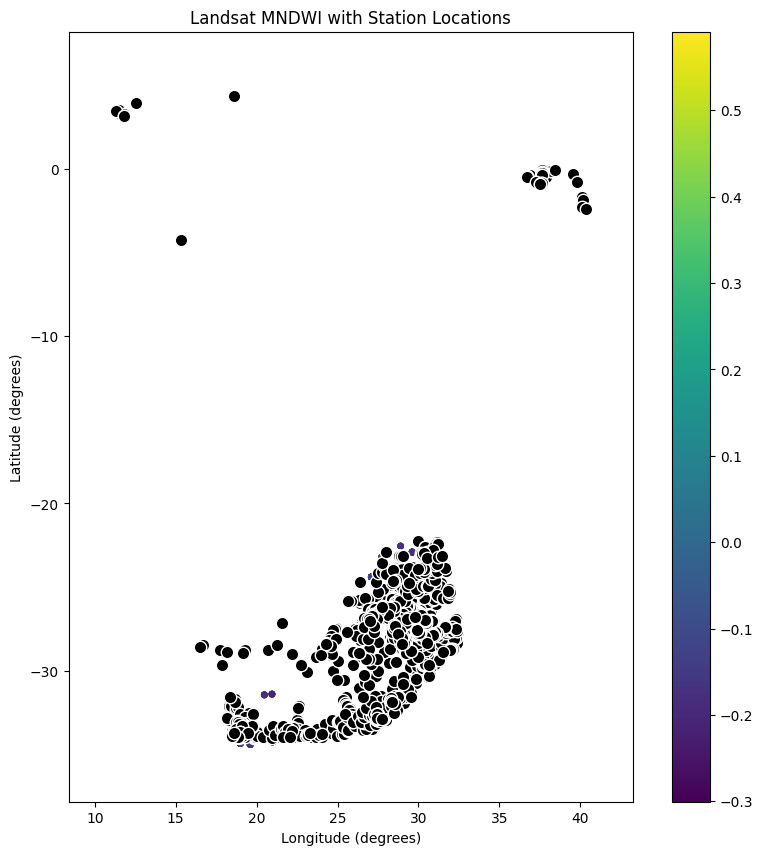

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

landsat_gdf.plot(
    column="MNDWI",      # change if your column name differs (e.g., "MNDWI" vs "mndwi")
    ax=ax,
    legend=True,
    markersize=15,
    alpha=0.6,
)

stations_gdf.plot(
    ax=ax,
    color="black",
    edgecolor="white",
    markersize=80,
)

ax.set_title("Landsat MNDWI with Station Locations")
ax.set_xlabel("Longitude (degrees)")
ax.set_ylabel("Latitude (degrees)")

# --- 3) Zoom to your stations (prevents the 'squished' plot problem) ---
minx, miny, maxx, maxy = stations_gdf.total_bounds
padx = (maxx - minx) * 0.10
pady = (maxy - miny) * 0.10
ax.set_xlim(minx - padx, maxx + padx)
ax.set_ylim(miny - pady, maxy + pady)

plt.show()


Check overlapping Landsat dataset with the stations

In [ ]:
# round coords to reduce floating mismatch
stations_xy = set(zip(stations_gdf.geometry.y.round(2), stations_gdf.geometry.x.round(2)))
landsat_xy  = set(zip(landsat_gdf.geometry.y.round(2),  landsat_gdf.geometry.x.round(2)))

overlap = len(stations_xy.intersection(landsat_xy))
print("Overlapping rounded coords:", overlap)
print("Stations unique coords:", len(stations_xy))
print("Landsat unique coords:", len(landsat_xy))

Overlapping rounded coords: 47
Stations unique coords: 1343
Landsat unique coords: 162


In [ ]:
landsat_df.head()

,Latitude,Longitude,Sample Date,nir,green,swir16,swir22,NDMI,MNDWI,geometry
0,-28.760833,17.730278,02-01-2011,11190.0,11426.0,7687.5,7645.0,0.185538,0.195595,POINT (17.730278 -28.760833)
1,-26.861111,28.884722,03-01-2011,17658.5,9550.0,13746.5,10574.0,0.124566,-0.180134,POINT (28.884722 -26.861111)
2,-26.450000,28.085833,03-01-2011,15210.0,10720.0,17974.0,14201.0,-0.083293,-0.252805,POINT (28.085833 -26.45)
3,-27.671111,27.236944,03-01-2011,14887.0,10943.0,13522.0,11403.0,0.048048,-0.105416,POINT (27.236944 -27.671111)
4,-27.356667,27.286389,03-01-2011,16828.5,9502.5,12665.5,9643.0,0.141147,-0.142683,POINT (27.286389 -27.356667)


(not sure I'm doing this correctly): find the closest station from loc_africa_df to each of the sampling point landsat_df, and report the distance to the nearest sampling point

In [ ]:
stations_m = stations_gdf.to_crs(epsg=3857)
landsat_m  = landsat_gdf.to_crs(epsg=3857)

# If you want only unique Landsat sampling locations:
landsat_unique = landsat_m.drop_duplicates(subset=["geometry"]).copy()

landsat_to_station = gpd.sjoin_nearest(
    landsat_unique,                 # LEFT: each landsat point
    stations_m[["STAT_ID", "geometry"]],  # RIGHT: station candidates
    how="left",
    distance_col="dist_m"
)

landsat_to_station["dist_km"] = landsat_to_station["dist_m"] / 1000

landsat_to_station[["Latitude","Longitude","STAT_ID","dist_km"]].head()


,Latitude,Longitude,STAT_ID,dist_km
0,-28.760833,17.730278,400473,0.110212
1,-26.861111,28.884722,401454,0.543625
2,-26.450000,28.085833,401494,0.649327
3,-27.671111,27.236944,401550,0.785515
4,-27.356667,27.286389,401551,1.097294


In [ ]:
landsat_to_station[["STAT_ID","dist_km"]].sort_values(by="dist_km").describe()

,STAT_ID,dist_km
count,169.000000,169.000000
mean,401003.698225,7.108875
std,843.965440,23.367565
min,400010.000000,0.110212
25%,400545.000000,0.649327
50%,400860.000000,0.909435
75%,401384.000000,1.349286
max,410412.000000,206.892585


In [ ]:
len(landsat_to_station)

169

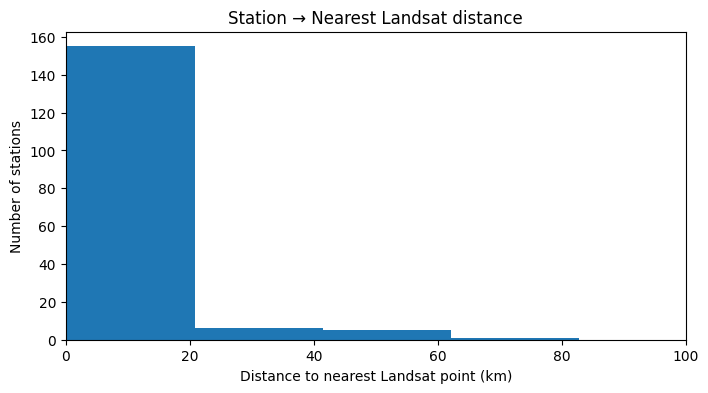

In [ ]:
plt.figure(figsize=(8,4))
plt.hist(landsat_to_station["dist_km"].dropna(), bins=10)
plt.xlim(0, 100)          # set x-axis limits here
plt.xlabel("Distance to nearest Landsat point (km)")
plt.ylabel("Number of stations")
plt.title("Station → Nearest Landsat distance")
plt.show()

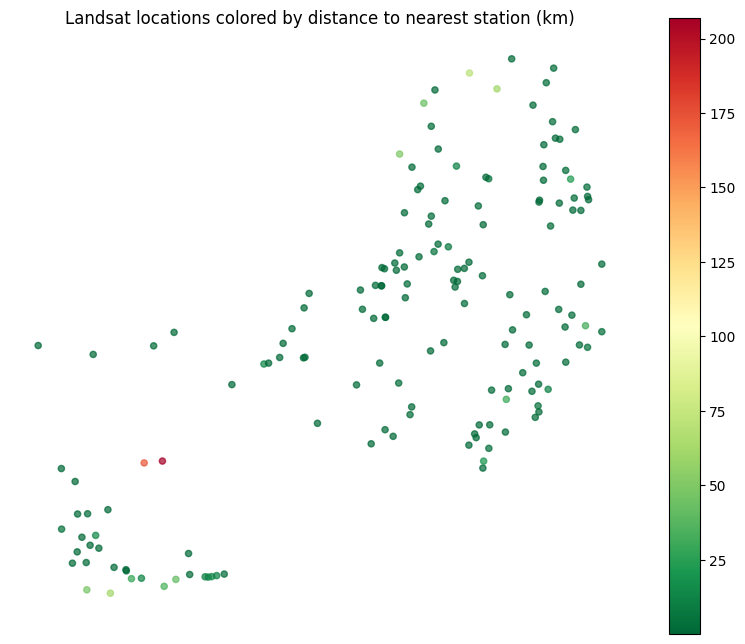

In [ ]:
from shapely.geometry import Point
from tqdm.auto import tqdm

tqdm.pandas()

# landsat_to_station must already exist with columns:
# ['Latitude','Longitude','STAT_ID','dist_km']

# ----------------------------
# 1) Aggregate duplicates (one row per unique Landsat lat/lon)
# ----------------------------
landsat_locations = (
    landsat_to_station
    .groupby(["Latitude", "Longitude"], as_index=False)
    .agg(
        dist_km=("dist_km", "min"),                    # closest station distance
        n_station_ids=("STAT_ID", "nunique"),          # how many station IDs appear for this point
        station_ids=("STAT_ID", lambda s: sorted(set(map(int, s))))  # list of unique station IDs
    )
)

# If you want a single station id (the one achieving min dist):
# (handles duplicates where multiple STAT_ID share same dist)
min_station = (
    landsat_to_station
    .sort_values(["Latitude", "Longitude", "dist_km"])
    .drop_duplicates(["Latitude", "Longitude"], keep="first")
    [["Latitude", "Longitude", "STAT_ID"]]
    .rename(columns={"STAT_ID": "STAT_ID_min"})
)
landsat_locations = landsat_locations.merge(min_station, on=["Latitude", "Longitude"], how="left")

# ----------------------------
# 2) Make GeoDataFrame (WGS84 lat/lon)
# ----------------------------
landsat_gdf = gpd.GeoDataFrame(
    landsat_locations,
    geometry=gpd.points_from_xy(landsat_locations["Longitude"], landsat_locations["Latitude"]),
    crs="EPSG:4326"
)

# ----------------------------
# 3) Plot color map (green=near, red=far)
#    NOTE: plotting millions of points is heavy; sample if needed.
# ----------------------------
max_plot = 200_000
plot_gdf = landsat_gdf
if len(plot_gdf) > max_plot:
    plot_gdf = plot_gdf.sample(max_plot, random_state=0)

fig, ax = plt.subplots(figsize=(10, 8))

plot_gdf.plot(
    ax=ax,
    column="dist_km",
    cmap="RdYlGn_r",          # green for low distance, red for high
    markersize=20,
    alpha=0.7,
    legend=True
)

ax.set_title("Landsat locations colored by distance to nearest station (km)")
ax.set_axis_off()
plt.show()



In [ ]:
# ----------------------------
# 4) Optional: mark "no station nearby" as red
#    (only makes sense if you define a threshold)
# ----------------------------
threshold_km = 2
landsat_gdf["has_station_nearby"] = landsat_gdf["dist_km"].notna() & (landsat_gdf["dist_km"] <= threshold_km)

landsat_gdf["has_station_nearby"].value_counts()

,count
has_station_nearby,
True,129
False,33


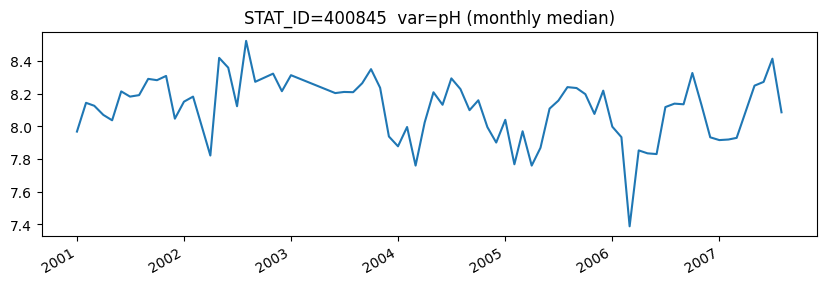

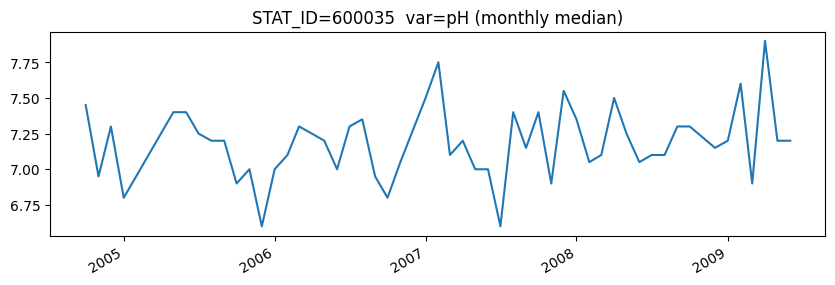

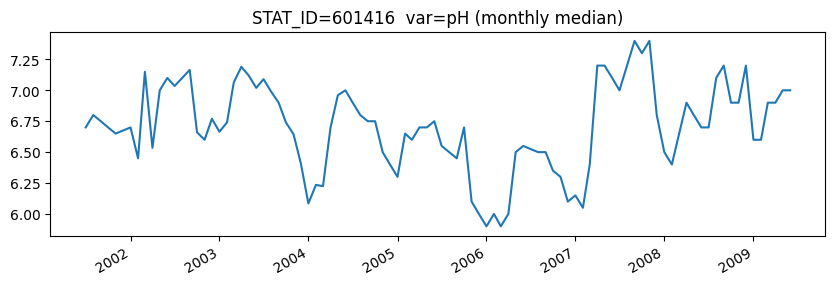

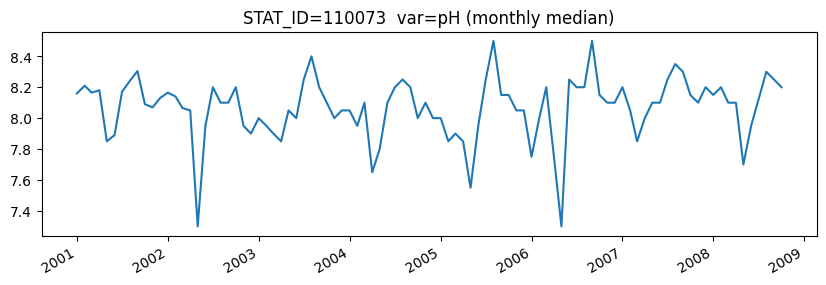

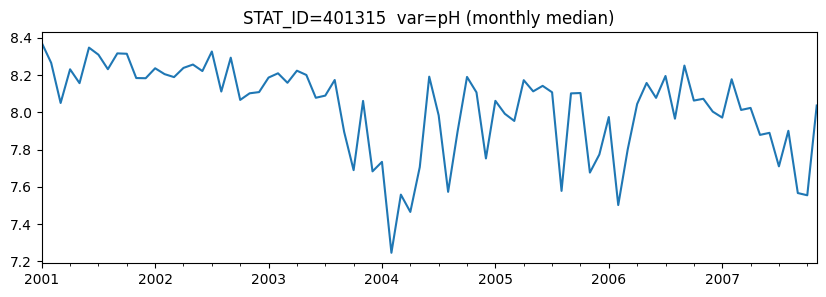

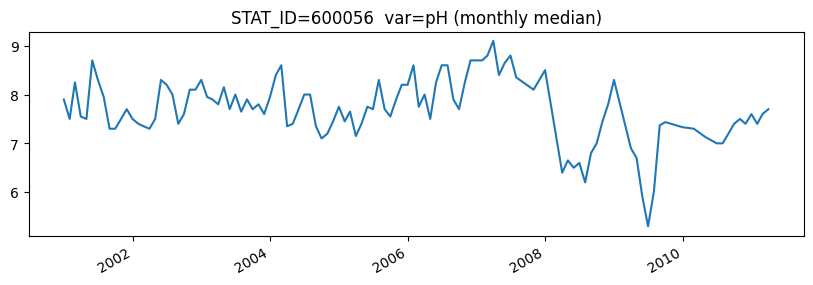

In [ ]:
def pick_stations_for_var(d, var, k=6, top_pool=200, seed=0):
    counts = d.dropna(subset=[var]).groupby("STAT_ID")[var].size().sort_values(ascending=False)
    pool = counts.head(top_pool).index.to_numpy()
    rng = np.random.default_rng(seed)
    return rng.choice(pool, size=min(k, len(pool)), replace=False)

def plot_station_series(d, station_id, var):
    g = (d[d["STAT_ID"]==station_id]
         .dropna(subset=[var])
         .groupby("month")[var].median()
         .sort_index())
    ax = g.plot(figsize=(10,3), title=f"STAT_ID={station_id}  var={var} (monthly median)")
    ax.set_xlabel("")
    plt.show()

var = "pH"
stations = pick_stations_for_var(hydrochem_df, var, k=6, seed=42)
for sid in stations:
    plot_station_series(hydrochem_df, sid, var)

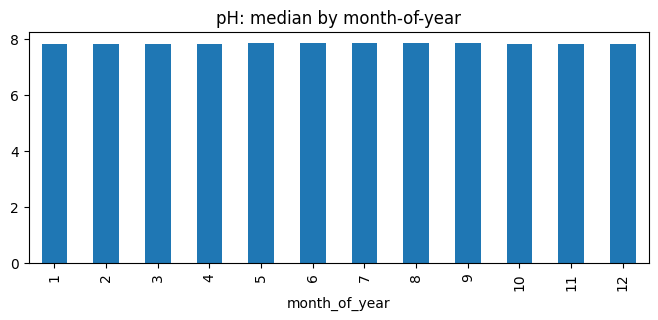

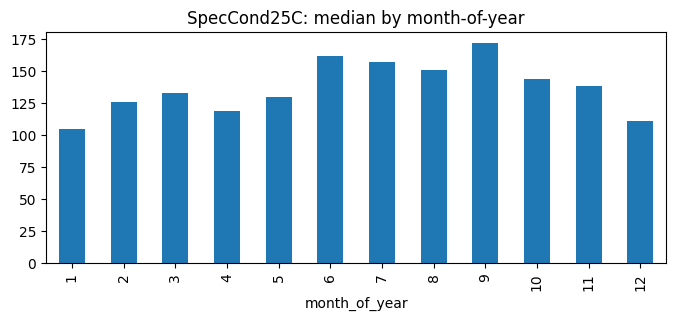

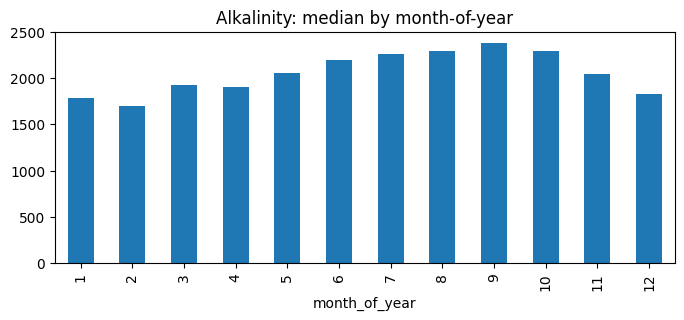

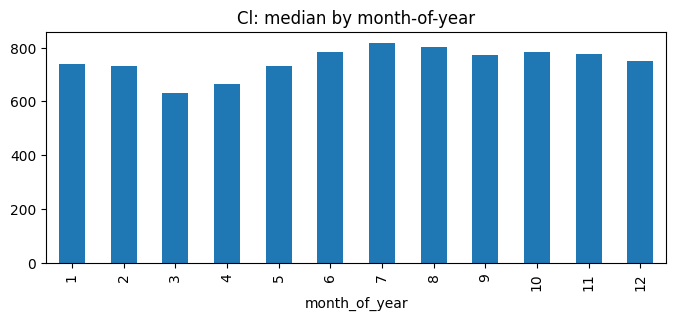

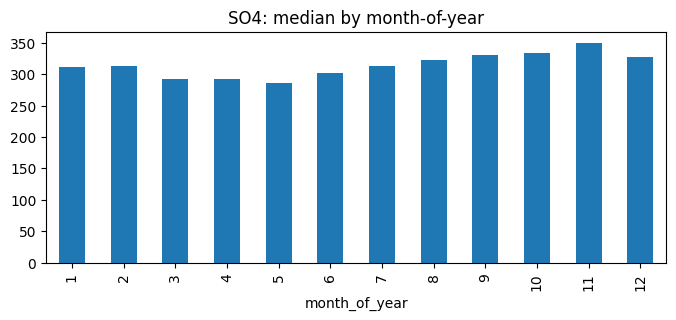

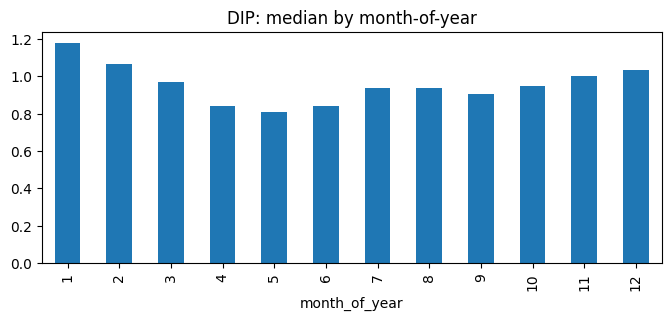

In [ ]:
vars_ = ["pH","SpecCond25C","Alkalinity","Cl","SO4","DIP"]
hydrochem_df["month_of_year"] = hydrochem_df["RESULT_DATETIME"].dt.month

def month_effect(d, var, min_samples=2000):
    sub = d.dropna(subset=[var])
    if len(sub) < min_samples:
        print("Too few samples for", var)
        return None
    bym = sub.groupby("month_of_year")[var].median()
    ax = bym.plot(kind="bar", figsize=(8,3), title=f"{var}: median by month-of-year")
    plt.show()
    return bym

for v in vars_:
    month_effect(hydrochem_df, v)

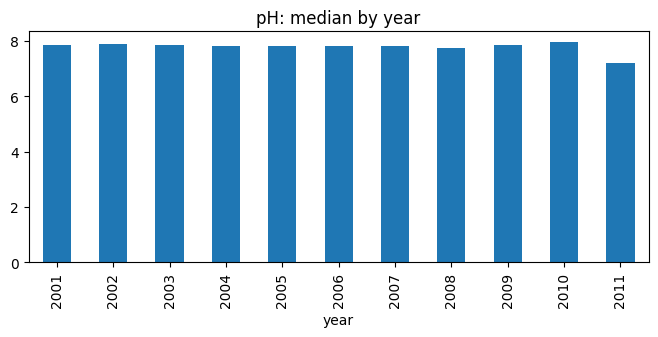

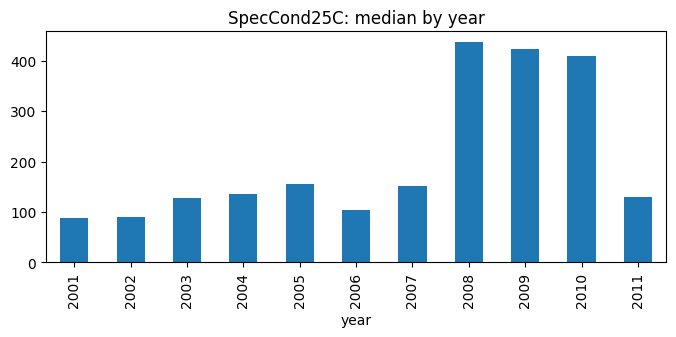

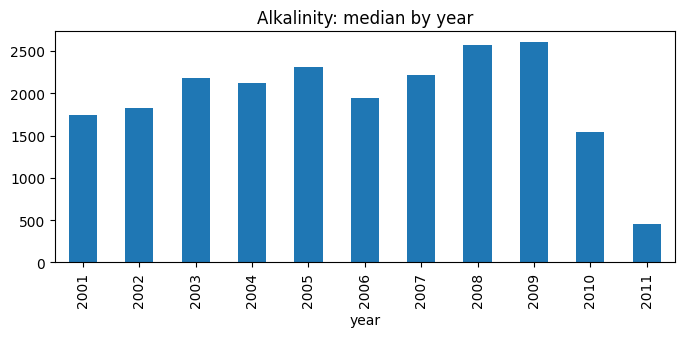

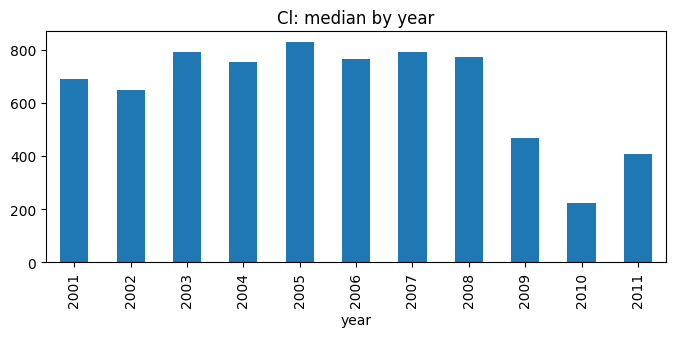

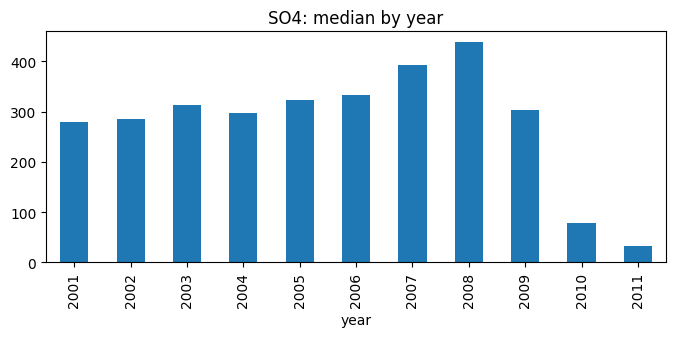

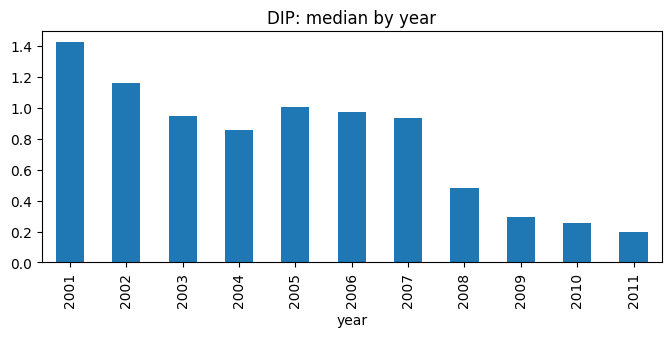

In [ ]:
def year_effect(d, var, start = 2001, end=2011, min_samples=2000):
    sub = d.dropna(subset=[var])
    if len(sub) < min_samples:
        print("Too few samples for", var)
        return None
    bym = sub.groupby("year")[var].median()
    ax = bym.plot(kind="bar", figsize=(8,3), title=f"{var}: median by year")
    plt.show()
    return bym

for v in vars_:
    year_effect(hydrochem_df, v, 100)

# Merged dataset

In [ ]:
catchment_df_filtered.head()

,STAT_ID,sc,ss,su,mt,va,vb,vi,pa,pb,pi,GLC_Artificial,GLC_Managed,GLC_Water,GLC_Aquatic_Veg,GLC_PERC_COV,Popdens_00,Soil_pH,SOC,Soil_wetness
0,101854,0.73,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.060000,0.18,0.010000,0.060000,100.0,959.58,6.35,6.56,109.93
1,101867,0.12,0.27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000047,0.64,0.000372,0.000186,100.0,9.07,6.43,7.59,101.67
2,101868,0.24,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000973,0.55,0.000649,0.000782,100.0,18.41,6.43,7.56,101.17
3,101869,0.53,0.18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000975,0.68,0.000000,0.000244,100.0,18.67,6.42,7.34,106.52
4,101870,0.73,0.22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000208,0.54,0.001869,0.000000,100.0,11.89,6.39,6.54,102.10


In [ ]:
print(f'Unique station catchments: {catchment_df_filtered['STAT_ID'].nunique()}')
print(f'Catchment df length: {len(catchment_df_filtered)}')
print('---')
print(f'Unique station - M-Y hydrochem: {len(hydrochem_df.groupby(['STAT_ID', 'month']))}')
print(f'Unique station hydrochem: {hydrochem_df['STAT_ID'].nunique()}')
print(f'hydrochem df length: {len(hydrochem_df)}')

Unique station catchments: 15514
Catchment df length: 15516
---
Unique station - M-Y hydrochem: 217582
Unique station hydrochem: 10961
hydrochem df length: 337262


In [ ]:
hydrochem_df_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217582 entries, 0 to 217581
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   STAT_ID        217582 non-null  int64         
 1   month          217582 non-null  datetime64[ns]
 2   pH             186963 non-null  float64       
 3   SpecCond25C    177657 non-null  float64       
 4   Alkalinity     110245 non-null  float64       
 5   Cl             126842 non-null  float64       
 6   SO4            113762 non-null  float64       
 7   DIP            158298 non-null  float64       
 8   year           217582 non-null  float64       
 9   month_of_year  217582 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 16.6 MB


In [ ]:
# select stations that are in South Africa
loc_africa_df = loc_africa_df[loc_africa_df['Country'] == 'South Africa']
loc_africa_df = loc_africa_df.drop(columns={'STATION_NAME', 'STATION_ID_ORIG', 'Country', 'CoordinateSystem'})
loc_africa_df.head()

,STAT_ID,Latitude,Longitude,geometry
13225,400120,-25.61,28.09,POINT (28.09 -25.61)
13226,400121,-25.61,28.11,POINT (28.11 -25.61)
13227,400122,-25.55,28.00,POINT (28 -25.55)
13228,400123,-25.52,28.02,POINT (28.02 -25.52)
13229,400124,-25.48,28.01,POINT (28.01 -25.48)


In [ ]:
merged = pd.merge(loc_africa_df, catchment_df_filtered, on='STAT_ID', how = 'inner')

In [ ]:
merged = pd.merge(merged, hydrochem_df_grouped, on = 'STAT_ID', how = 'left')

In [ ]:
len(merged)

46556

In [ ]:
print(path)

/content/drive/My Drive/ECAs/EY DS Challenge 2026/dataset/Glorich


In [ ]:
merged.to_csv("/content/drive/My Drive/ECAs/EY DS Challenge 2026/dataset/Glorich/final_glorich_dataset.csv", index=False)

In [ ]:
merged.columns

Index(['STAT_ID', 'Latitude', 'Longitude', 'geometry', 'sc', 'ss', 'su', 'mt',
       'va', 'vb', 'vi', 'pa', 'pb', 'pi', 'GLC_Artificial', 'GLC_Managed',
       'GLC_Water', 'GLC_Aquatic_Veg', 'GLC_PERC_COV', 'Popdens_00', 'Soil_pH',
       'SOC', 'Soil_wetness', 'month', 'pH', 'SpecCond25C', 'Alkalinity', 'Cl',
       'SO4', 'DIP', 'year', 'month_of_year'],
      dtype='object')

# Statistics of merged df

In [ ]:
merged.describe()

,STAT_ID,Latitude,Longitude,sc,ss,su,mt,va,vb,vi,pa,pb,pi,GLC_Artificial,GLC_Managed,GLC_Water,GLC_Aquatic_Veg,GLC_PERC_COV,Popdens_00,Soil_pH,SOC,Soil_wetness,month,pH,SpecCond25C,Alkalinity,Cl,SO4,DIP,year,month_of_year
count,46556.000000,46556.000000,46556.000000,46556.000000,46556.000000,46556.000000,46556.000000,46556.000000,46556.000000,46556.000000,46556.000000,46556.000000,46556.000000,46556.000000,46556.000000,46556.000000,46556.0,46556.0,46556.000000,46504.000000,46504.000000,46504.000000,46516,43596.000000,41553.000000,34642.000000,37059.000000,38355.000000,40444.000000,46516.000000,46516.000000
mean,400909.237327,-28.422925,27.464665,0.037703,0.582726,0.008212,0.042507,0.007277,0.120687,0.017794,0.083736,0.020479,0.004501,0.083776,0.293331,0.004474,0.0,100.0,227.438328,6.667263,3.860065,60.226447,2004-08-03 16:10:56.290308608,7.753093,71.959299,2342.727375,2985.928668,1058.742613,8.609095,2004.144574,6.362843
min,400001.000000,-33.990000,16.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,100.0,0.000000,5.640000,1.610000,1.250000,2001-01-01 00:00:00,2.537000,0.500000,10.000000,28.209000,5.205000,0.065000,2001.000000,1.000000
25%,400616.000000,-31.610000,26.740000,0.000000,0.310000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.120000,0.000000,0.0,100.0,13.380000,6.450000,3.620000,42.060000,2002-11-01 00:00:00,7.524000,16.800000,827.019750,231.685550,85.798875,0.665000,2002.000000,3.000000
50%,400866.000000,-27.410000,28.260000,0.000000,0.650000,0.000000,0.000000,0.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.260000,0.001566,0.0,100.0,44.060000,6.640000,3.800000,59.560000,2004-10-01 00:00:00,7.880000,39.000000,1880.000000,651.594000,242.327667,1.356000,2004.000000,6.000000
75%,401347.000000,-25.850000,29.920000,0.000000,0.870000,0.000000,0.020000,0.000000,0.180000,0.001454,0.030000,0.000000,0.000000,0.020000,0.440000,0.005625,0.0,100.0,168.770000,6.850000,4.190000,78.450000,2006-05-01 00:00:00,8.170500,72.750000,3243.021250,1673.716542,822.437000,3.655050,2006.000000,9.000000
max,401573.000000,-22.220000,32.420000,1.000000,1.000000,0.990000,0.970000,0.810000,1.000000,0.840000,1.000000,1.000000,0.460000,1.000000,0.950000,0.330000,0.0,100.0,9745.130000,7.650000,5.610000,143.060000,2008-01-01 00:00:00,12.500000,4370.000000,21720.000000,541982.482000,42475.223000,13044.882000,2008.000000,12.000000
std,429.983759,3.178831,3.569676,0.112304,0.321016,0.063816,0.121837,0.043344,0.154820,0.060413,0.191540,0.098208,0.033124,0.215071,0.213018,0.014934,0.0,0.0,545.870659,0.404011,0.529179,27.667457,NaN,0.718086,155.532053,2018.160820,15816.985415,2723.676076,72.105069,1.993296,3.394116


In [ ]:
# group by station id
g = merged[['STAT_ID', 'sc', 'ss', 'su', 'mt',
       'va', 'vb', 'vi', 'pa', 'pb', 'pi', 'GLC_Artificial', 'GLC_Managed',
       'GLC_Water', 'GLC_Aquatic_Veg', 'GLC_PERC_COV', 'Popdens_00', 'Soil_pH',
       'SOC', 'Soil_wetness', 'month', 'pH', 'SpecCond25C', 'Alkalinity', 'Cl',
       'SO4', 'DIP']].groupby("STAT_ID").agg(["mean", "std"])

# optional: flatten column names
g.columns = [f"{c}_{stat}" for c, stat in g.columns]
g = g.reset_index()
g.head()

In [ ]:
id_col = "STAT_ID"
num = merged.select_dtypes(include="number").columns

std_by_station_var = merged.groupby(id_col)[num].std()

In [ ]:
std_by_station_var.head()

,STAT_ID,Latitude,Longitude,sc,ss,su,mt,va,vb,vi,pa,pb,pi,GLC_Artificial,GLC_Managed,GLC_Water,GLC_Aquatic_Veg,GLC_PERC_COV,Popdens_00,Soil_pH,SOC,Soil_wetness,pH,SpecCond25C,Alkalinity,Cl,SO4,DIP,year,month_of_year
STAT_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
400001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.377595,74.246212,1146.290803,5687.452174,201.606750,28.403065,3.535534,1.414214
400002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
400003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
400004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
400005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.664505,520.265317,2566.797079,27910.906227,1107.177339,2.741067,2.886751,3.605551


In [ ]:
# variation within variation
std_by_station_var.describe()

,STAT_ID,Latitude,Longitude,sc,ss,su,mt,va,vb,vi,pa,pb,pi,GLC_Artificial,GLC_Managed,GLC_Water,GLC_Aquatic_Veg,GLC_PERC_COV,Popdens_00,Soil_pH,SOC,Soil_wetness,pH,SpecCond25C,Alkalinity,Cl,SO4,DIP,year,month_of_year
count,1119.0,1119.0,1119.0,1119.0,1119.0,1119.0,1119.0,1119.0,1119.0,1119.0,1119.0,1119.0,1119.0,1119.0,1119.0,1119.0,1119.0,1119.0,1119.0,1118.0,1118.0,1118.0,1061.000000,1014.000000,831.000000,877.000000,893.000000,987.000000,1119.000000,1119.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.356214,28.378987,699.390221,1388.256525,569.245764,14.506984,1.552646,3.288132
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.232646,69.824612,630.316546,7351.026600,1314.849347,99.953837,0.637597,0.576093
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.577350
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.223777,4.967502,233.652675,99.713930,43.334413,0.924219,1.073834,3.267445
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.301321,11.755859,517.079560,286.618866,119.292209,2.097608,1.848804,3.418270
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.415233,25.044623,985.807076,724.140550,477.584154,7.891655,1.999921,3.500363
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.343075,1506.841302,5123.117083,188634.518823,10949.643791,2977.540436,3.535534,7.071068
